# Tarea Unidad 3 - Aprendizaje Supervisado

Fecha de entrega: **Viernes 11 de Junio de 2021 a las 23:59**.

- Consultas por slack o al correo felipe dot quezada at uach dot cl
- 4 integrantes como maximo.

Integrantes:
- Ricardo Coronado
- Diego Sandoval


La tarea consiste en resolver 2 problemas utilizando los contenidos vistos hasta ahora. En la carpetas `datos/` se encuentran el dataset para el segundo problema. Para el primero problema, existe un link a un archivo compartido en google drive, que se encuentra mas abajo.

# 1: Clasificacion de Asteroides

**ALERTA! IMPACTO DE ASTEROIDE!** La nueva base espacial de Pluto esta constantemente bajo ataque de asteroides provenientes de un agujero blanco cercano. No son asteroides muy grandes, pero si han causado importantes daños en la infraestructura. Por esta razon, la Union Intergalactica Terrestre le ha pedido a usted, como experto en aprendizaje supervisado, hacerse cargo del problema. La base cuenta con equipamiento especial para detectar y pulverizar a los asteroides, sin embargo, como los recursos son limitados, se debe usar correctamente. Las características del asteroide se pueden calcular al instante con instrumentos especializados, solo hace falta alguna manera de poder utilizar esa información y predecir cuando son peligrosos y cuando no.

Para lograr la tarea, se ha puesto a su disposicion un listado de asteroides con sus caracteristicas y su etiqueta. El dataset esta compuesto por los siguientes campos:

- name: Nombre del asteroide
- a: Eje semi-mayor (grad)
- e: excentricidad (km)
- i: Inclinacion con respecto al plano eliptico x-y (grados)
- om: Longitud en el nodo ascendente (km)
- w: Valor de Perihelio (km)
- q: Distancia de Perihelio (km)
- ad: Distancia de Afelio (km)
- per_y: Periodo orbital (años)
- data_arc: Usado para cruzar info.
- condition_code: condicion del asteroide. De peor a mejor: 0, 1, 2, 3, 4, 5, 6, 7, D, E
- n_obs_used: numero de mediciones
- H: parametro de Magnitud Absoluta
- pha: VARIABLE OBJETIVO, pregunta, el asteroide presenta un peligro? N o Y
- diameter: Diametro (km)
- extent: extencion (km x km x km)
- albedo: porcentje de radiacion reflejada (Bq)
- rot_per: velocidad rotacion (m/s)
- GM: Masa global (m)
- BV: Volumen (m3)
- UB: Cantidad de Ultravioleta reflejada (Bq)
- IR: Cantidad de IR reflejados (Bq)
- G: Gravedad esperada (m/s2)
- moid: ID interno para cruzar datos
- class: Tipo de asteroide, 0, 1, 2, 3, 4, 5, 6, 7
- n: Rotacion (grados/dias)
- per: Periodo orbital (dias)
- ma: Anomalia media en grados.

**Objetivo Principal**
- Entrenar un Regresor Logistico capaz de predecir si el asteroide es peligroso o no.

El dataset se encuentra en: 

https://drive.google.com/file/d/1g_7HvzXQCtZ57X3inevTE4mQ49gZU6FW/view?usp=sharing


Para esto debe utilizar todos los contenidos vistos en la unidad. Esto incluye, pero no se limita a limpiar, preprocesar y segregar el dataset, entrenar y evaluar el modelo, etc... Cada decision que pueda ser considerada importante debe ser justificada, es decir, debe explicar por que no esta haciendo las cosas de otra manera. Recuerde, analize correctamente los datos, y sea consciente de lo que este haciendo su codigo para evitar errores *paranormales*. Finalmente debe terminar con un resumen de los principales desafios y resultados, comentando los resultados en funcion de las metricas vistas en clase. Para el Accuracy, comentar por que cree que obtuvo ese resultado.


## Respuesta


In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn

In [ ]:
# Descargue y localice el archivo Asteroides en carpeta datos
df = pd.read_csv("datos/Asteroides.csv", sep=';')
df.replace(np.nan, -99999, inplace=True) # para reconocer como outlier
df = df.drop(['name'], axis=1)

Sorpresivamente, no se puede emplear **df.dropna()**, ya que la gran mayoría de las filas presentan ese valor, por ende, se le asignó el valor de -99999 para que sea considerado como outlier.  
Para la columna pha, los asteroides simbolizados con N e Y pasan a tener valores 0 y 1, respectivamente. Esto debido a que KNN nos lanzaba un error de compatibilidad entre 'str' e 'int'. **Recordar que KNN funciona calculando la distancia**. 

In [ ]:
variable_objetivo = df['pha']
variable_objetivo.replace('N', 0, inplace=True)
variable_objetivo.replace('Y', 1, inplace=True)
display(variable_objetivo.value_counts())

De esta forma, podemos asegurar el **desbalance de clase**.


In [ ]:
# Aplicando Undersampling


In [ ]:
# Aplicando Oversampling

In [ ]:
# En GM, convertir comas a puntos
import re
df['GM']= df['GM'].apply(lambda x: re.sub(',', '.', str(x)))
df['condition_code'] = df['condition_code'].replace('D', 8)
df['condition_code'] = df['condition_code'].replace('E', 9)
df['GM'] = df['GM'].astype(float)

In [ ]:
# Convertir extent que tiene los datos en formato AxBxC A*B*C
def extent_str_to_value(x):
    if isinstance(x, str) and 'x' in x:
        valores = x.split('x')
        valor = float(valores[0]) * float(valores[1]) * float(valores[2])
        return valor
    else:
        return float(x)

df['extent'] = df['extent'].apply(extent_str_to_value)

In [ ]:
# Class presenta problemas
df['class'].replace('MBA', 0, inplace=True)
df['class'].replace('OMB', 1, inplace=True)
df['class'].replace('IMB', 2, inplace=True)
df['class'].replace('MCA', 3, inplace=True)
df['class'].replace('APO', 4, inplace=True)
df['class'].replace('AMO', 5, inplace=True)
df['class'].replace('TJN', 6, inplace=True)
df['class'].replace('TNO', 7, inplace=True)
df['class'].replace('ATE', 8, inplace=True)
df['class'].replace('CEN', 9, inplace=True)
df['class'].replace('AST', 10, inplace=True)
df['class'].replace('IEO', 11, inplace=True)
df['class'].replace('HYA', 12, inplace=True)
df['class'].replace('PAA', 13, inplace=True)

Se dropeó la columna 'name', puesto que molestaba el estudio.    
Ahora evaluaremos que tan correlacionados están los datos de nuestra matriz de estudio

In [ ]:
df = df.apply(pd.to_numeric)

import matplotlib.cm as cm
fig, ax = plt.subplots(figsize=(15,5), tight_layout=True)
f = ax.matshow(df.corr(), vmin=-1, vmax=1)

ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.columns)))
ax.set_xticklabels(df.columns,rotation=90)
ax.set_yticklabels(df.columns)

fig.colorbar(f, ax=ax);

### Explicar conclusión de la correlación y medidas para solucionar el problema !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [ ]:
# Para tener una mayor precision, cambiar estos valores.
X = df
y = variable_objetivo

Se particionó el conjunto de datos en proporción 80:20, 80% para el entrenamiento y 20% para el testeo

In [ ]:
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

classifier = neighbors.KNeighborsClassifier()
classifier.fit(X_train,y_train)

accuracy = classifier.score(X_test,y_test)

print("La precision del test es de:")
print(accuracy)

El método **score(X,y)** retorna la precisión media en los datos de prueba y las etiquetas. En la clasificación  multi-label, esta es la precisión del subconjunto, que es una métrica rigurosa, ya que requiere para cada muestra que cada conjunto de etiquetas se prediga correctamente. Siendo 0 el mínimo y 1 el máximo valor de precisión

In [ ]:
# generamos 1000 muestras aleatorias del conjunto de datos para evaluar la eficacia del algoritmo
example = df.sample(n=1000)
print('Se desea estudiar el asteroide con los siguientes valores: ')
example

In [ ]:
prediction = classifier.predict(example)
if(prediction.all() == 0): 
    print("los asteoides no presentan riesgo")

else:
    if(prediction.any() == 1): 
        print("El asteroide presenta riesgo")
    else:
        print(";)")

Se intuye que la clase presenta un desbalance. Esto porque los asteroides que no son un riesgo son más ¿Cómo solucionar esto?....

# 2: Hallando la respuesta de la vida

Un grupo de arqueologos ha logrado encontrar la ultima pieza de una antigua tablilla sumeria con la respuesta de la vida, y necesitan de tu ayuda para descifrar sus secretos. Normalmente, las tablillan muestran una onda tal que al ser reproducidas en un altavoz, resuenan con otro artefacto sumerio a una cierta frecuencia. Esta frecuencia despues es traducida en una palabra utilizando un diccionario especial. Desafortunadamente, la ultima onda presenta perdida de informacion y ruido, debido al transcurso de los años. 

Hasta ahora solo han podido descifrar "La Respuesta de la Vida esta en ______".

Su mision es tomar la poca informacion que se tiene de la onda y tratar de descifrar la señal original.

**Objetivo Principal**
- Entrenar un Regresor Lineal para estimar la señal original.

Se espera que el error de reconstruccion sea el menor posible. Para esto, puede medir el error promedio de las predicciones de su modelo utilizando una metrica como el Error Medio Cuadratico.

$$\frac{1}{N}\sum_{i=0}^N(y_i - \hat y_i)^2$$

donde $y_i$ es la etiqueta, $\hat y_i$ es la prediccion de su modelo y $N$ el numero de observaciones. Se recomienda analizar la informacion que se tiene para hacer predicciones mas precisas.

**El entregable** sera este mismo notebook modificado con todo el procedimiento y los comentarios. Enviar al correo indicado al inicio del documento.
Se evaluara el procedimiento y la calidad de las justificaciones, ademas de los resultados obtenidos.

## Desarrollo

Se cargan los datos de la señal original:

In [44]:
X = pd.read_csv("datos/X.csv", sep=';',names=["X"])
y = pd.read_csv("datos/y.csv", sep=';',names=["y"])
print(X.values)
print(y.values)

[[  3.83883884]
 [ -9.66866867]
 [ 12.4014014 ]
 [  0.53353353]
 [  8.80980981]
 [ 12.03703704]
 [-11.33433433]
 [  8.13313313]
 [-12.63563564]
 [ -8.93993994]
 [-11.95895896]
 [ -0.1951952 ]
 [ -3.13613614]
 [ -8.13313313]
 [  6.85785786]
 [ -7.37837838]
 [  7.58658659]
 [-11.64664665]
 [  9.85085085]
 [ -4.22922923]
 [  6.46746747]
 [  5.71271271]
 [  5.84284284]
 [ -5.32232232]
 [  5.24424424]
 [ -6.46746747]
 [  5.89489489]
 [ -1.002002  ]
 [ -1.15815816]
 [ 12.92192192]
 [  8.21121121]
 [  9.43443443]
 [ -5.998999  ]
 [ -7.76876877]
 [ -8.80980981]
 [  1.44444444]
 [  5.97297297]
 [ -2.56356356]
 [  5.27027027]
 [ -0.61161161]
 [  8.36736737]
 [  7.06606607]
 [-10.26726727]
 [  1.7047047 ]
 [ -2.87587588]
 [-12.97397397]
 [ 11.38638639]
 [ 12.55755756]
 [  1.6006006 ]
 [-10.91791792]
 [ -7.66466466]
 [-12.11511512]
 [  7.17017017]
 [  0.22122122]
 [ -1.88688689]
 [ -1.18418418]
 [ -3.47447447]
 [-10.63163163]
 [ -4.17717718]
 [ 10.34534535]
 [  1.67867868]
 [ -4.02102102]
 [  7.19

Como se puede apreciar en la salida de la celda anterior, se posee una señal que tiene informacion en un eje $X$ y un eje $y$, pero sin un orden establecido, por lo que a continuacion se ordenará para una mejor visualizacion

In [45]:
X=X["X"]
y=y["y"]
idx = np.argsort(X)
X = np.asarray([X[i] for i in idx])
y = np.asarray([y[i] for i in idx])

<IPython.core.display.Javascript object>


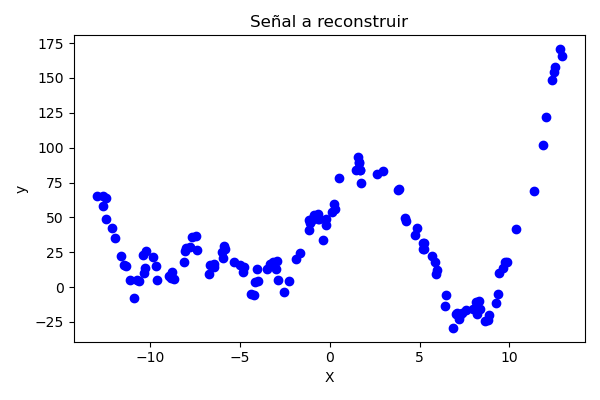

In [46]:
fig, ax = plt.subplots(figsize=(6,4), tight_layout=True)
ax.set_title("Señal a reconstruir")
ax.set_xlabel("X")
ax.set_ylabel("y")
ax.plot(X,y, 'bo');

Una vez ya visualizados los datos, se procederá a realizar la regresión. Sin embargo primero se debe estructurar los datos para realizar dicha tarea, para ello se separará en un conjunto de entrenamiento de la regresion y otro para la evaluación.

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score #Error medio cuadratico
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #Se separa el set para entrenamiento y prueba
#Conjunto de Train: 80%
#Conjunto de Test: 20%


print(X_train.shape)
idx_train = np.argsort(X_train)
X_train = np.asarray([X_train[i] for i in idx_train])
y_train = np.asarray([y_train[i] for i in idx_train])

idx_test = np.argsort(X_test)
X_test = np.asarray([X_test[i] for i in idx_test])
y_test = np.asarray([y_test[i] for i in idx_test])

#se ajustan los datos para poder ser utilizado en la libreria sklearn
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

(104,)


Separados los datos, se trabaja con el conjunto de entrenamiento para buscar el polinomio que mejor se adapte a los datos, es decir, que posea el menor error cuadratico medio posible

<IPython.core.display.Javascript object>


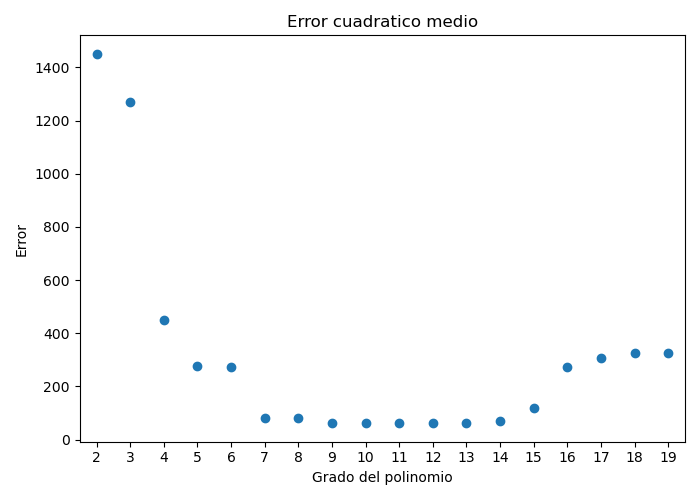

El polinomio de grado 13 obtuvo el mejor error de 61.373


In [48]:
#inicialización de parametros
best_error = 1e9
best_grade = 0
er_grade = []


#busqueda del mejor grado
for i in range(2, 20):
    poly = PolynomialFeatures(degree = i)
    X_poly = poly.fit_transform(X_train)
    poly.fit(X_train, y_train)

    model = LinearRegression()
    model.fit(X_poly, y_train)

    y_pred = model.predict(X_poly)
    err = mean_squared_error(y_train, y_pred)
    er_grade.append(err)
    if(err < best_error):
        best_error = err
        best_grade = i
        
    #print(model.coef_)

    #fig2, ax2 = plt.subplots(figsize=(6,4), tight_layout=True)
    #plt.scatter(X_train, y_train)
    #plt.plot(X_train, y_pred)
    #plt.scatter(X_train, y_pred)

    #print(mean_squared_error(y_train, y_pred))
    #print(r2_score(y_train, y_pred))

In [ ]:
fig_er, ax_er = plt.subplots(figsize=(7,5),tight_layout=True)
ax_er.set_title("Error cuadratico medio")
ax_er.set_xlabel("Grado del polinomio")
ax_er.set_ylabel("Error")
ax_er.scatter(range(2,20),er_grade)
ax_er.set_xlim([1.5,19.5])
ax_er.set_xticks(range(2,20));

print("El polinomio de grado {g} obtuvo el mejor error de {e}".format(g=best_grade,e=np.around(best_error,3)))

Volveremos a hacer una regresion polinomial con los datos, pero ahora será con el grado que nos entregó mejor error.

In [49]:
poly = PolynomialFeatures(degree = best_grade)
X_poly = poly.fit_transform(X_train)
poly.fit(X_train, y_train)

model = LinearRegression()
model.fit(X_poly, y_train)

y_pred = model.predict(X_poly)

Procederemos a graficar con los datos de entrenamiento:

<IPython.core.display.Javascript object>


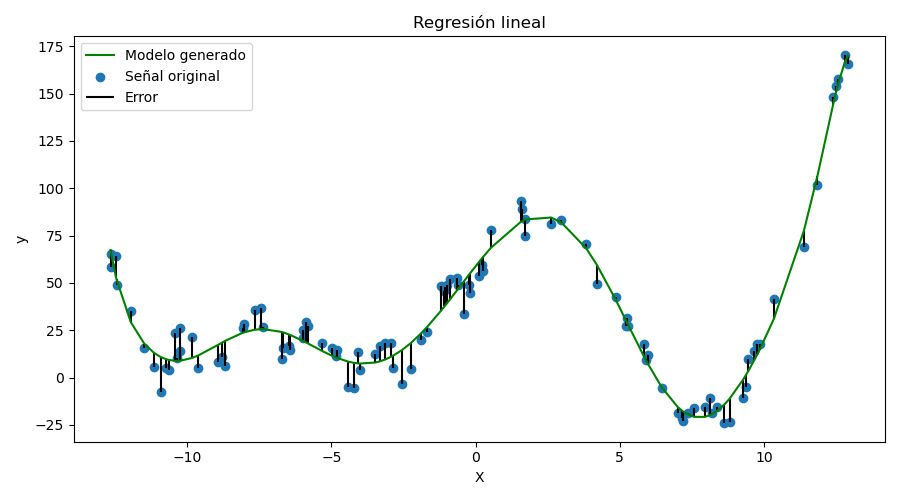

In [53]:
fig2, ax2 = plt.subplots(figsize=(9,5), tight_layout=True)
ax2.set_title("Regresión lineal")
ax2.set_xlabel("X")
ax2.set_ylabel("y")
ax2.scatter(X_train, y_train, label = "Señal original")
ax2.plot(X_train, y_pred,"g", label = "Modelo generado")
ax2.vlines(X_train,y_train,y_pred,"k",label="Error")
ax2.legend();